In [1]:
from sklearn.datasets import fetch_openml
# import pandas as pd
import matplotlib as mpl
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, roc_curve, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# This would have been a way to import the MNIST Data from Scikit-learn but my network was poor wich i then downloaded
mnist = fetch_openml('mnist_784', version=1)

C:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

The MNIST data contains 70,000 features and 784 labels

In [4]:
X, y = mnist['data'], mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
from skle

(1, 784)


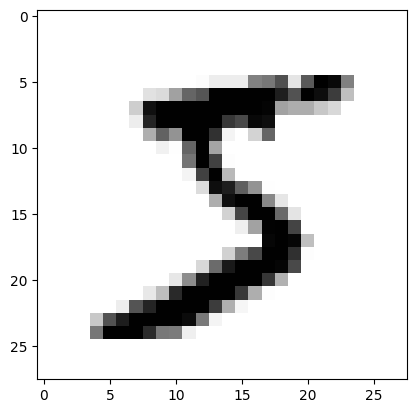

In [26]:
# Show an image
some_digits = X[0:1]
some_digits = np.array(some_digits, dtype='float')
some_digits_image = some_digits.reshape(28,28)
print(some_digits.shape)
plt.imshow(some_digits_image, cmap=mpl.cm.binary, interpolation='antialiased') #other form of interpolation to generate pixel are: 'nearest', 'bicubic', 'bilinear' Check out the Documentation to understand more 
plt.axis('on')
plt.show()

In [11]:
# Convert y to int so that we can be able to use it
y = y.astype(np.uint8)
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype
--------------  -----
70000 non-null  uint8
dtypes: uint8(1)
memory usage: 68.5 KB


In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
# Check if my Set's are Bias
ydf = np.array(y_train, dtype="int")
ydft = np.array(y_test, dtype="int")
y_train_bias_5 = print(f"Size of row in train set: {len(ydf)}\nThis is the sum of 5 in the train set: {sum(ydf==5)}\nThis is the sum of 5 that are not 5 in the train set: {sum(ydf!=5)}")
y_test_bias_show = print(f"Size of row in test set: {len(ydft)}\nThis is the sum of 5 in the test set: {sum(ydft==5)}\nThis is the sum of 5 that are not 5 in the test set: {sum(ydft!=5)}")
y_train_5 = y_train == 5
y_test_5 = y_test == 5

Size of row in train set: 60000
This is the sum of 5 in the train set: 5421
This is the sum of 5 that are not 5 in the train set: 54579
Size of row in test set: 10000
This is the sum of 5 in the test set: 892
This is the sum of 5 that are not 5 in the test set: 9108


In [9]:
sdf_clf = SGDClassifier(random_state=42)
sdf_clf_fit = sdf_clf.fit(X_train, y_train_5)

y_pred = sdf_clf_fit.predict(some_digits)

C:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [10]:
cross_score = cross_val_score(sdf_clf, X_train, y_train_5,cv=3, scoring="accuracy") # K-folds cross validation means spliting the training set into k-folds(in this case, 5), then making prediction and evaluating them on each fold using model a model trained on the remaining folds. It reture the evaluation score

In [51]:
y_train_pred = cross_val_predict(sdf_clf, X_train,y_train_5, cv=3) # returns the predictions made on each test fold
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [12]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

53892 = True Negative(TN)
687 = False Positive(FP)
1891 = False Negative(FN)
3530 = True Positive(TP)
For a perfect model our wrongly predicted value(i.e: FP and FN) should be 0. We could also try using the Precision, Recall, and F1_score
## Mathematically 
*Precision* = TP/(TP + FP)
*Recall* = TP/(TP + FN)
*F1_score* = 2 × (precision × recall)/(precision + recall)



In [13]:
y_scores = cross_val_predict(sdf_clf, X_train, y_train_5, cv=3, method="decision_function")

In [14]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [15]:
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

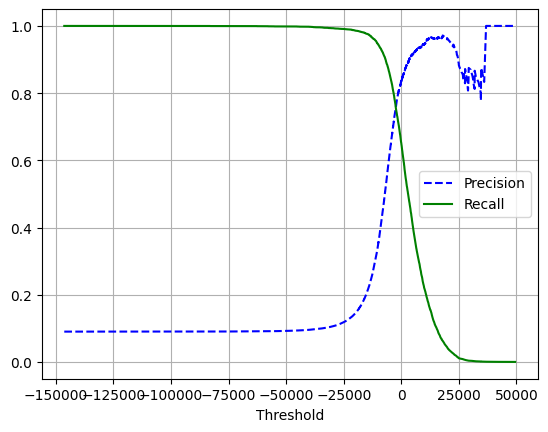

In [16]:
def plot_precision_recall_vs_threshold(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'b--', label = "Precision")
    plt.plot(threshold, recall[:-1], "-g", label="Recall")
    plt.xlabel("Threshold")
    plt.autoscale()
    plt.grid(visible=True)
    plt.legend()
    
plot_precision_recall_vs_threshold(precision,recall, threshold)
plt.show()

From the plot: why the precision plot is bumpier is because Precision tends to go down when you increase the threshold. On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth 

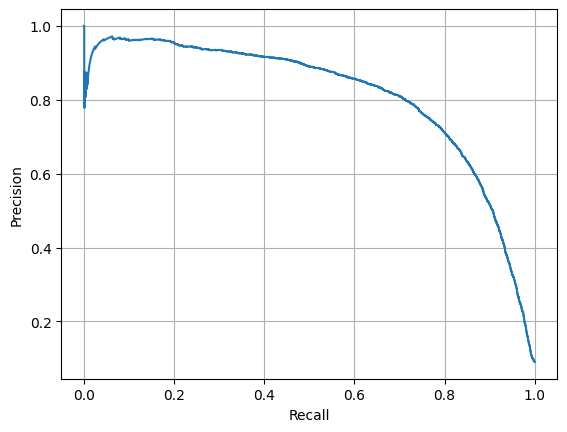

In [17]:
plt.plot(recall,precision,scalex=True)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.grid(visible=True)

Supposedly we are looking for 95% precision from our model we will use the following

In [18]:
threshold_95_precision = threshold[np.argmax(precision >= 0.95)]

In [19]:
y_train_pred_95 = (y_scores >= threshold_95_precision)


In [20]:
precision_score(y_train_5, y_train_pred_95) # Now we've acheived a 95% precision score for our model

0.9503367003367004

In [21]:
recall_score(y_train_5, y_train_pred_95) # Note that our recall score is very poor with 20.8% score. Which quantify this 'A high-precision classifier is not very useful if its recall is too low'

0.20826415790444566

# ROC Curve And ROC AUC 

In [22]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, label=label)
    plt.plot([0,1], [0,1], 'b--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate(Recall)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


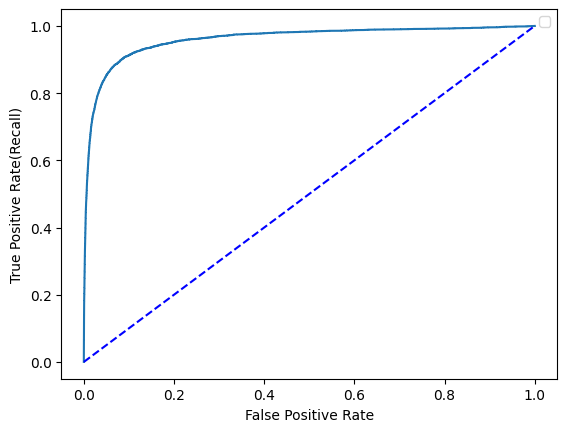

In [24]:
plot_roc_curve(fpr,tpr)

In [25]:
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

When do will Decide when to use precision/recall curve or AUC Curve is whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise

*Let's try and train a new model and compare both the ruc cuve with the old model*

In [26]:
forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, method='predict_proba')

In [27]:
y_probas_forest

array([[0.14, 0.86],
       [0.99, 0.01],
       [0.98, 0.02],
       ...,
       [0.01, 0.99],
       [0.96, 0.04],
       [0.96, 0.04]])

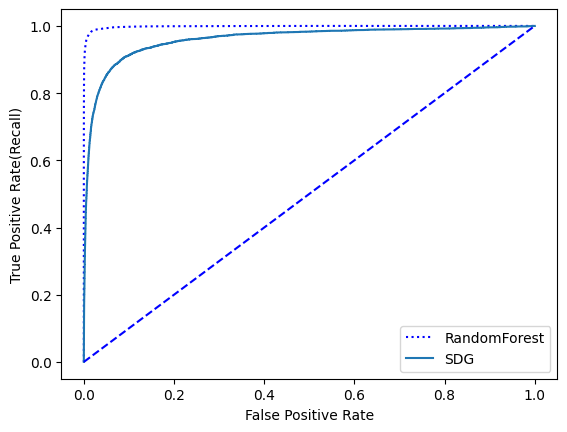

In [28]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.plot(fpr_forest, tpr_forest, 'b:', label='RandomForest')
plot_roc_curve(fpr, tpr, label='SDG')
plt.legend()

In [29]:
roc_auc_score(y_train_5, y_scores_forest)

0.998402186461512

In [30]:
y_pred_forest = y_scores_forest >= 0.5

precision_score(y_train_5, y_pred_forest) # 99% precision score 
recall_score(y_train_5, y_pred_forest) # 87.9% recall score

0.8791735842095554

In [31]:
confusion_matrix(y_train_5, y_pred_forest)

array([[54533,    46],
       [  655,  4766]], dtype=int64)

# Multiclass Model

## Multiclass Classifier is also known as Multinomial Classifier

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine(SVM) classifiers or Linear classifiers) are strictly binary classifiers. But if we want to use Binary Classifier we can achieve that by training the model on each instance(0-9).Then, when you want to classify an image, you get the decision score from each classifier for that image, and you select the class whose classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest)


In [32]:
sdf_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [33]:
sdf_clf.predict(some_digits)

C:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [34]:
some_digits_score = sdf_clf.decision_function(some_digits)

some_digits_score

C:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [35]:
np.argmax(some_digits_score)

3

In [36]:
print(sdf_clf.classes_)
print(sdf_clf.classes_[3])

[0 1 2 3 4 5 6 7 8 9]
3


If you want to force Scikit learn to use  one-versus-one(OvO) or one-versus-all(OvA) you can explicitly call them.
* One-versus-One: This is compared agaist every class. This results in a binary classifier for each pair of classses. Example:
Classifier 1: Class A vs Class B
Classifier 1: Class A vs Class C
Classifier 1: Class B vs Class C



* One-versus-All: Each classes is compared against all other classes. Example
Classifier 1: Class A vs (Class B + Class C)
Classifier 2: Class B vs (Class A + Class C)
Classifier 1: Class C vs (Class A + Class B)

*OvO may perform better but may require computational complexity*

In [37]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict(some_digits)

C:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [38]:
len(ovo_clf.estimators_)

45

In [39]:
ovo_score = ovo_clf.decision_function(some_digits)
np.argmax(ovo_score)

C:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


5

In [40]:
forest_clf.fit(X_train, y_train)
forest_clf.predict_proba(some_digits) # RandomForest can easily classify instances on multiple classes

C:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

Now let's evaluate our Multiclass model using accuracy

In [41]:
cross_val_score(sdf_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

Let's Scale our training set and measure it accuracy

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [21]:
cross_val_score(sdf_clf, X_train_scaled, y_train, cv=2, scoring='accuracy')

NameError: name 'sdf_clf' is not defined

## Error Analysis

In [44]:
y_train_pred_scaled = cross_val_predict(sdf_clf, X_train_scaled, y_train, cv = 2)

conf_mx = confusion_matrix(y_train, y_train_pred_scaled)
conf_mx

C:\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5601,    0,   26,    7,   11,   53,   39,    6,  179,    1],
       [   0, 6427,   45,   21,    4,   48,    4,   11,  171,   11],
       [  31,   32, 5279,   90,   65,   25,   74,   46,  303,   13],
       [  29,   24,  125, 5238,    2,  224,   26,   45,  337,   81],
       [  15,   14,   52,   12, 5246,   10,   39,   24,  262,  168],
       [  33,   17,   32,  173,   50, 4486,   79,   23,  452,   76],
       [  29,   19,   46,    2,   48,   95, 5560,    5,  113,    1],
       [  18,   12,   58,   27,   53,    9,    4, 5731,  130,  223],
       [  19,   67,   57,   82,    4,  122,   31,   10, 5395,   64],
       [  22,   17,   36,   62,  133,   28,    1,  182,  287, 5181]],
      dtype=int64)

It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s 'matshow()' function

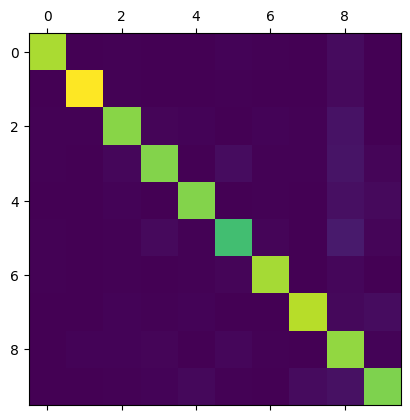

In [45]:
plt.matshow(conf_mx)
plt.show()

In [46]:
row_sum = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sum

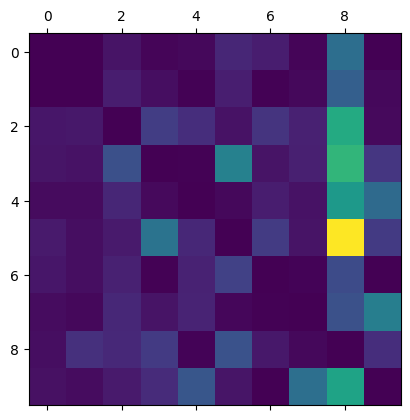

In [50]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx)
plt.show()

In [48]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

NameError: name 'plot_digits' is not defined

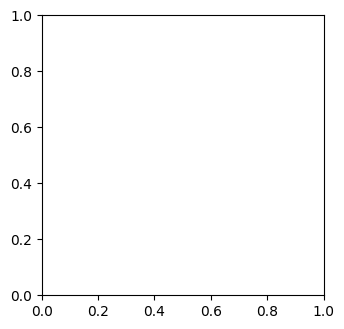

In [49]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


## Multilabel Classification

Supposing we what to build a face recognition system, and we have three faces which we will use to train the model classifier. We will want to attach tags to every person it recognizes.Such a classification system that outputs multiple binary tags is called a multilabel classification system.


In [ ]:
y_train_large = (y_train >= 7)
y_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_odd]

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict(some_digit)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

# In par‐ticular, if you have many more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier’s score on pictures of Alice. One simple option is to give each label a weight equal to its support (i.e., the number of instances with that target label). To do this, simply set average="weighted" in the preceding code.
         